In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from math import pi
import matplotlib.patches as mp

In [2]:
preradar = pd.read_csv("/home/chit/Desktop/Hiwi_BMC/micestudies/radar_info.csv", sep=",")
all_model = preradar['model']
radar = preradar[['model', 'parameter','smd']]

In [3]:
grouping = {'A: MAJOR IMMUNE CELLS':['Th-Cs','Tc-Cs','Tr-Cs','γδ-Cs','DCs','PT','B-Cs','NT','PB','NKC','MC','LCs','MP','PT'],
           'B: MAJOR CYTOKINE AND CHEMOKINE MARKERS':['IL-23','IL-22','IL-17','INF-γ','IFN-α','TNF-α','IL-2','IL-12','IL-1β','IL-1α','IL-4','IL-5','IL-13','IL-33','IL-10'],
           'C: FUNCTIONS OVERLYING ON MULTIPLE CELL TYPES':['IL-6','CXCR3','CXCL9','CXCL12','CXCR4','CCL2','CCR1','CCR2','CCR3','CCR5','CCR7','IL-16','CCL17','CCL22','CCL20','CD11b ','IL-7','IL-9','IL-15','IL-21','CD45','IL-8','TGF-β', 'TLR4']}

In [4]:
for i in range(len(radar['parameter'])):
    if 'dendritic cells' in radar['parameter'][i]:
        radar['parameter'][i] = 'DCs'   

for i in range(len(radar['parameter'])):
    if 'T cells' in radar['parameter'][i]:
        radar['parameter'][i] = 'Tc-Cs' 
        
for i in range(len(radar['parameter'])):
    if 'CD4 T cell' in radar['parameter'][i]:
        radar['parameter'][i] = 'Tc-Cs' 
        
for i in range(len(radar['parameter'])):
    if 'CD8 T cell' in radar['parameter'][i]:
        radar['parameter'][i] = 'Tc-Cs' 
        
for i in range(len(radar['parameter'])):
    if 'B cells' in radar['parameter'][i]:
        radar['parameter'][i] = 'B-Cs' 
        
for i in range(len(radar['parameter'])):
    if 'IFN-gamma' in radar['parameter'][i]:
        radar['parameter'][i] = 'INF-γ' 

for i in range(len(radar['parameter'])):
    if 'TH1' in radar['parameter'][i]:
        radar['parameter'][i] = 'Th-Cs' 

for i in range(len(radar['parameter'])):
    if 'TH17' in radar['parameter'][i]:
        radar['parameter'][i] = 'Th-Cs'   
        
for i in range(len(radar['parameter'])):
    if 'TNF-a' in radar['parameter'][i]:
        radar['parameter'][i] = 'TNF-α'       
        
for i in range(len(radar['parameter'])):
    if 'IL-1B' in radar['parameter'][i]:
        radar['parameter'][i] = 'IL-1β'  
        
for i in range(len(radar['parameter'])):
    if 'IL-1b' in radar['parameter'][i]:
        radar['parameter'][i] = 'IL-1β'   
        
for i in range(len(radar['parameter'])):
    if 'IL-1a' in radar['parameter'][i]:
        radar['parameter'][i] = 'IL-1α'

for i in range(len(radar['parameter'])):
    if 'TGF-b' in radar['parameter'][i]:
        radar['parameter'][i] = 'TGF-β'   
    
for i in range(len(radar['parameter'])):
    if 'IL-17A' in radar['parameter'][i]:
        radar['parameter'][i] = 'IL-17' 

for i in range(len(radar['parameter'])):
    if 'IL-17a' in radar['parameter'][i]:
        radar['parameter'][i] = 'IL-17' 
        
radar.iloc[46].parameter = 'IL-17'
        ###change T cells, B cells, dendritic cells, INF-gamma, TH cells

/home/chit/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chit/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/chit/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [5]:
##arg: group, model
radar['group'] = list(map(lambda x: [u for u,v in grouping.items() for i in v if i == x], radar['parameter']))
radar['group'] = list(map(lambda x: ''.join(x), radar['group']))
size = [11,10,8]

/home/chit/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/chit/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


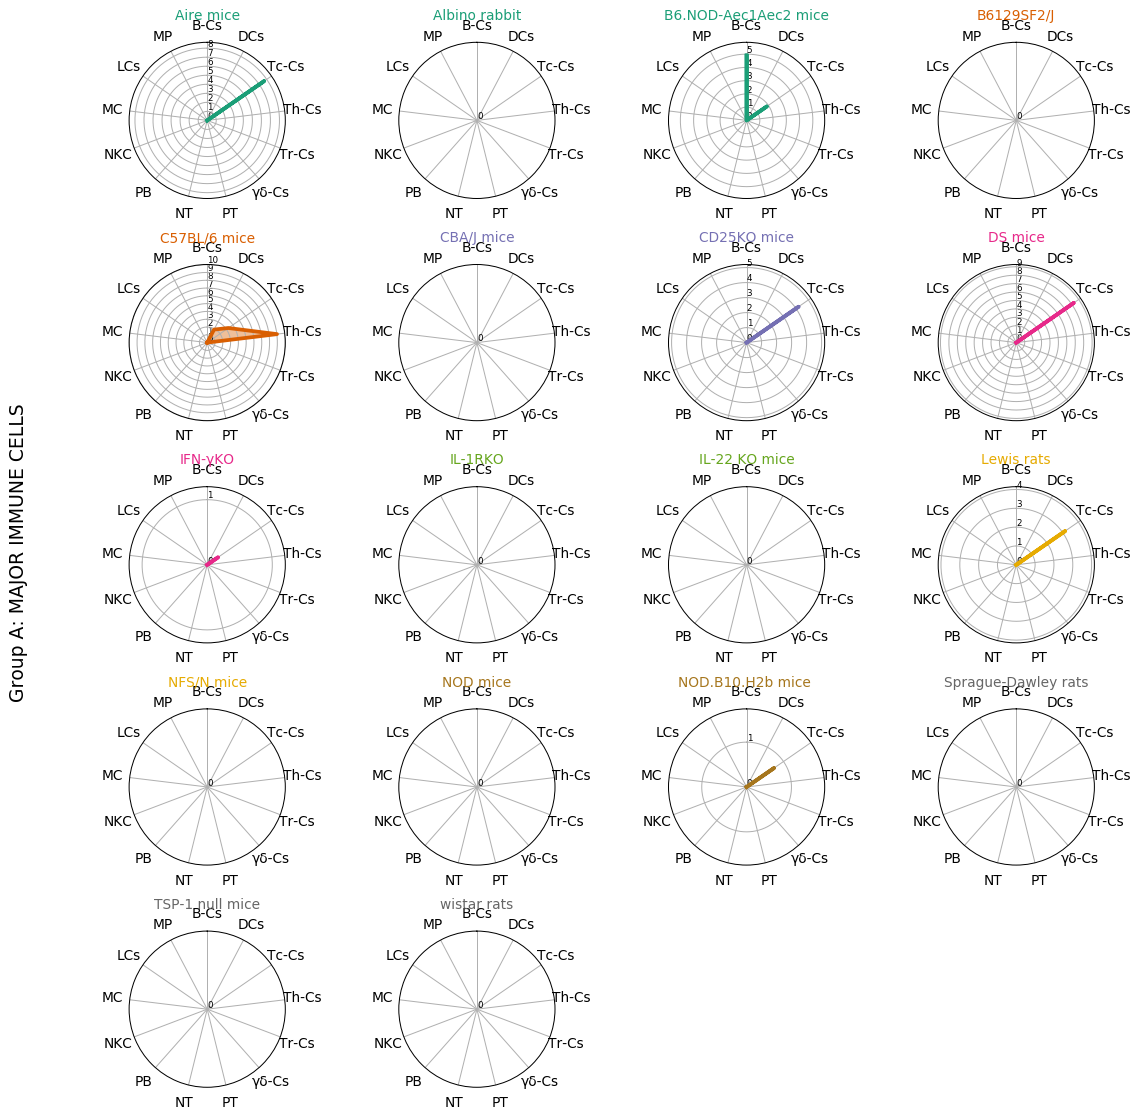

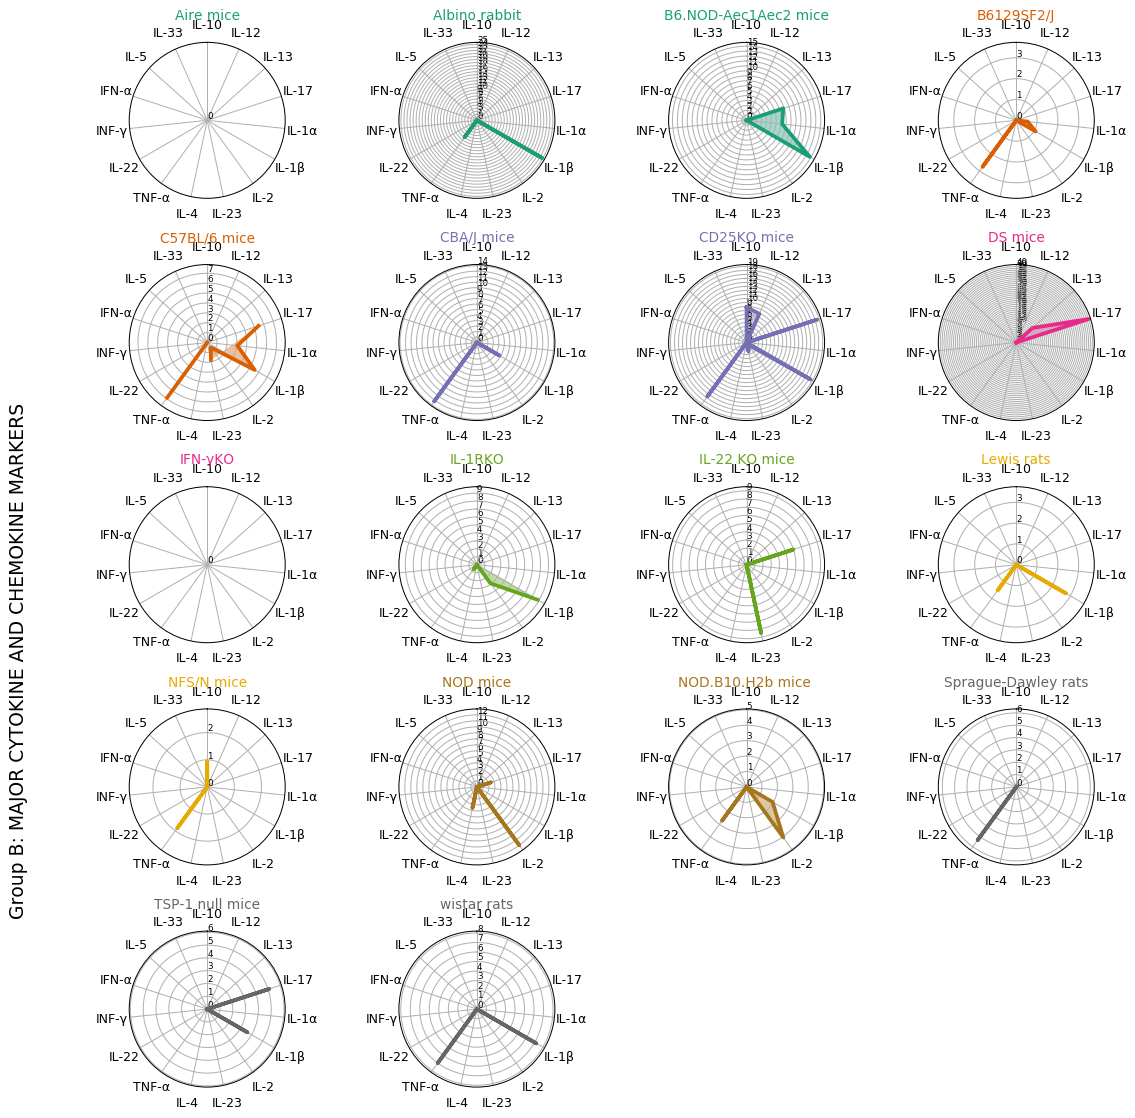

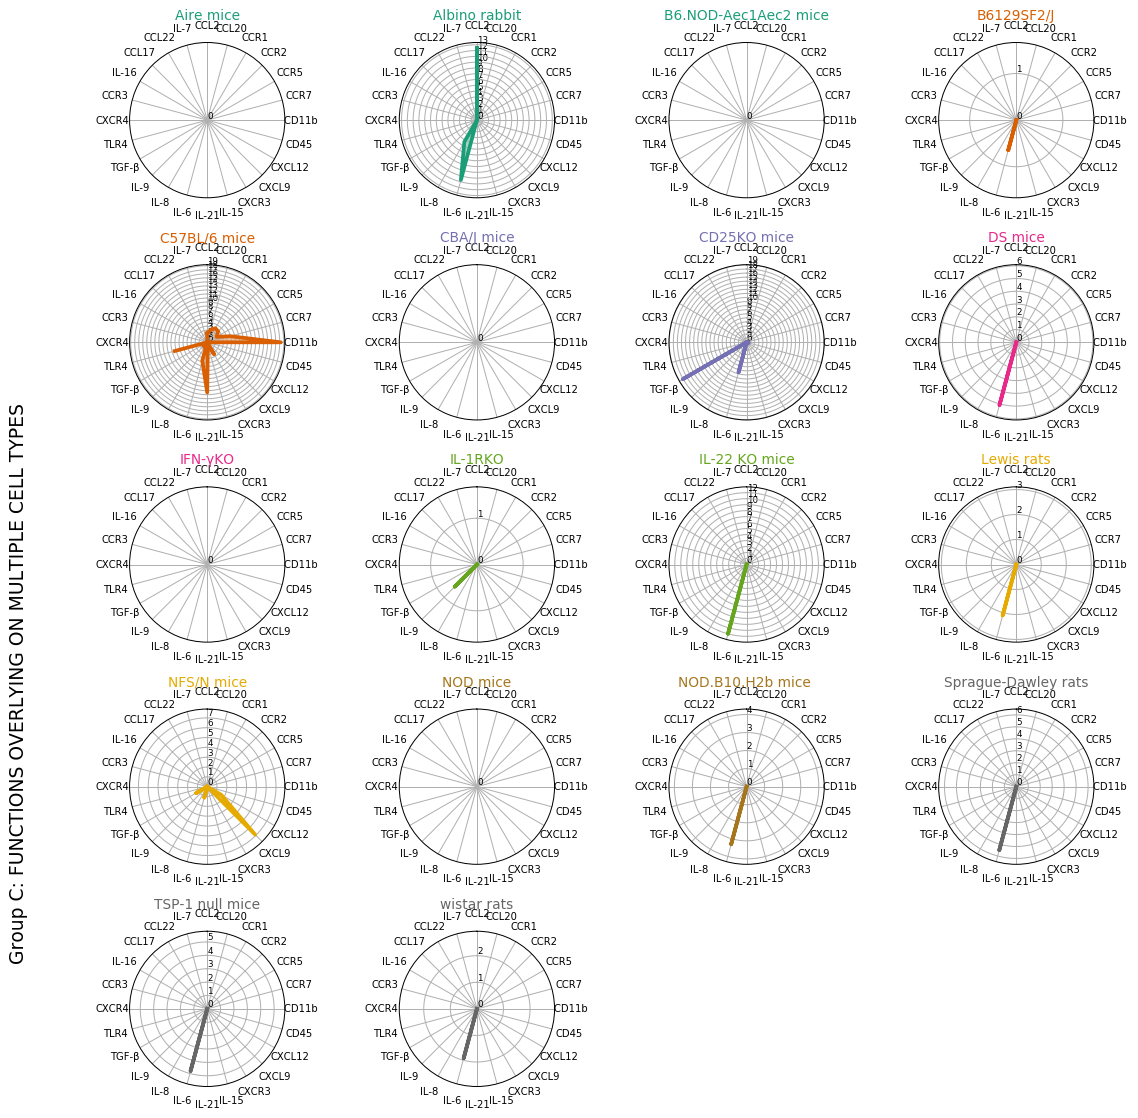

In [6]:
def filter_data(group):
    ## filter for groups
    A= radar[radar['group']==group]
    
    df = pd.pivot_table(A, columns='parameter', values='smd', index='model')
    
    ##combine all parameters and models
    for x in grouping[group]:
        if x not in df.columns:
            df[x] = 0

    for y in all_model:
        if y not in df.index:
            df.loc[y] = 0
    df = df.fillna(0)
    return(df.sort_index())

def make_radar(row, title, color,size):
    parameter = df.columns
    N = len(parameter)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax=plt.subplot(5,4,row+1, polar=True)
    
    
    #set 0 on top
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)

    
    
    plt.xticks(angles[:-1], parameter, color='black',size=size)
    ax.set_rlabel_position(0)

    values=df.iloc[row].values.flatten().tolist()
    values+=values[:1]
    
    plt.yticks(np.arange(0,max(values)+1, 1),color='black', size=7)
    plt.ylim(0, max(values)+1)
    
    ax.plot(angles, values, linewidth=3, linestyle='solid', color=color)
    ax.fill(angles, values, alpha=0.4, color=color)
    
    plt.title(df.index[row], size=11, y=1.1, color=color)
    plt.subplots_adjust(hspace=0.2, top=0.9, bottom=0.08)
    plt.tight_layout()

if __name__ == "__main__":
    count=0
    for d in grouping.keys():
        df = filter_data(d)
        
        my_dpi=90
        fig = plt.figure(figsize=(1200/my_dpi, 1200/my_dpi), dpi=my_dpi)
        my_palette = plt.cm.get_cmap("Dark2", len(df.index))
        
        s=size[count]
        count+=1
        for row in range(len(df.index)):
            #if np.sum(df, axis=1)[row]==0:
            #    continue
            #else:
                make_radar(row=row, title=df.index[row], color=my_palette(row),size=s)
            
        fig.subplots_adjust(top=0.9,left=0.1)  
        fig.suptitle('Group '+d, size=15, rotation=90, x=0.05,y=0.6)
    
        plt.savefig("/home/chit/Desktop/Hiwi_BMC/micestudies/radar_plot_{}.png".format(d), height=500)
        

In [7]:
cd25 = filter_data("C: FUNCTIONS OVERLYING ON MULTIPLE CELL TYPES")
cd25ko = cd25[cd25.index=="CD25KO mice"]
cd25ko

parameter,CCL2,CCL20,CCR1,CCR2,CCR5,CCR7,CD11b,CD45,CXCL12,CXCL9,...,IL-8,IL-9,TGF-β,TLR4,CXCR4,CCR3,IL-16,CCL17,CCL22,IL-7
model,,,,,,,,,,,,,,,,,,,,,
CD25KO mice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479899,0.0,0.0,...,0.0,0.0,18.064516,0.0,0,0,0,0,0,0


Text(0.05, 0.6, 'Group C: FUNCTIONS OVERLYING ON MULTIPLE CELL TYPES')

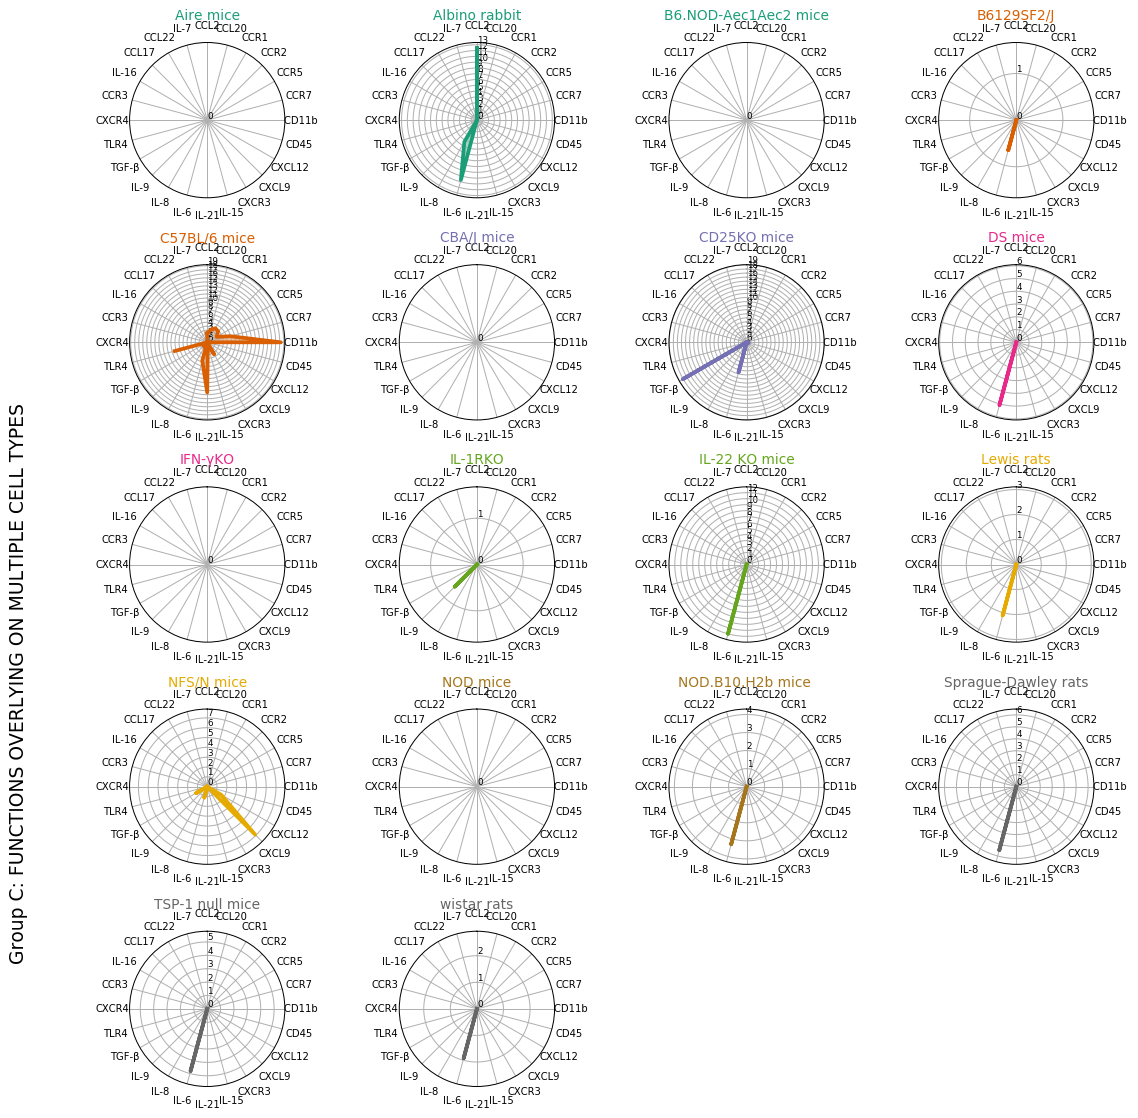

In [8]:
my_dpi=90
fig = plt.figure(figsize=(1200/my_dpi, 1200/my_dpi), dpi=my_dpi)
my_palette = plt.cm.get_cmap("Dark2", len(cd25.index))
        
s=8
for row in range(len(cd25.index)):
            #if np.sum(df, axis=1)[row]==0:
            #    continue
            #else:
    make_radar(row=row, title=df.index[row], color=my_palette(row),size=s)
            
fig.subplots_adjust(top=0.9,left=0.1)  
fig.suptitle('Group '+d, size=15, rotation=90, x=0.05,y=0.6)